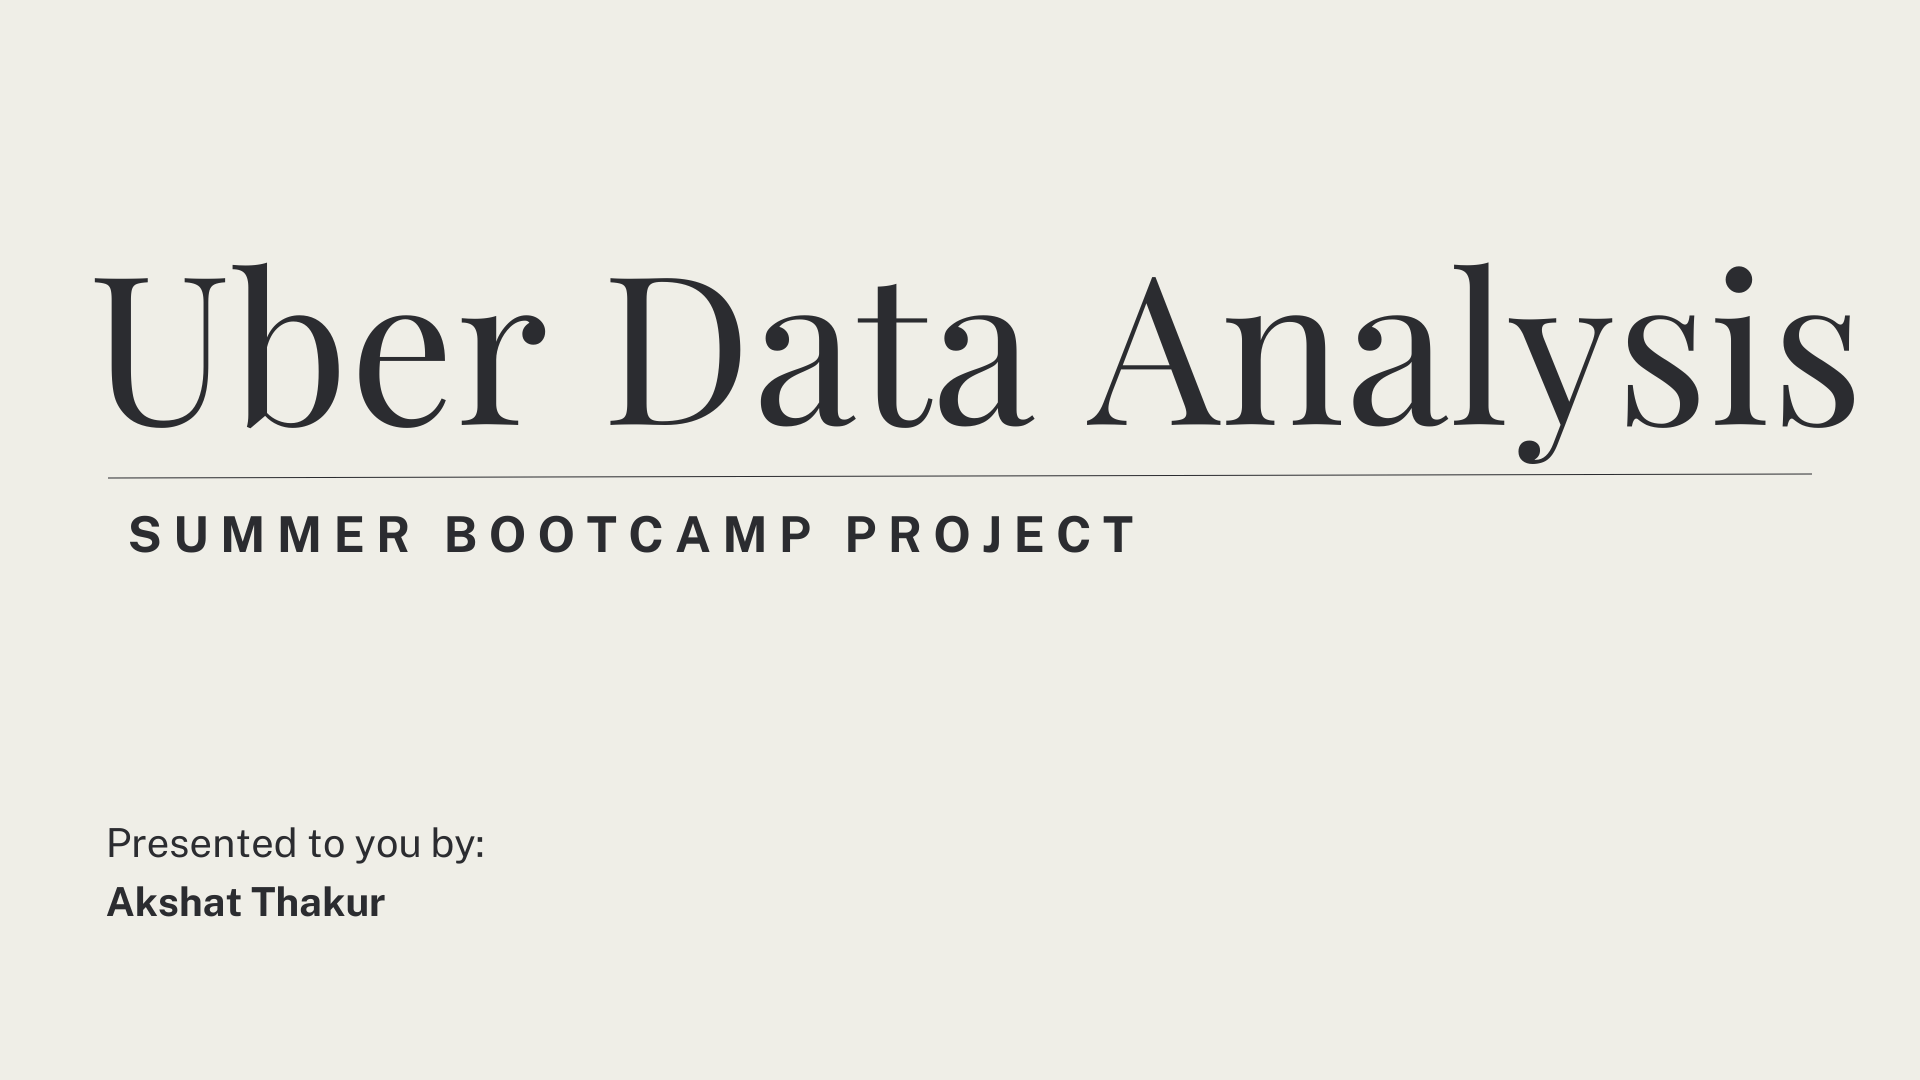

##**About the Data**
The data contains the details for the Uber rides across various boroughs (subdivisions) of New York City at an hourly level and attributes associated with weather conditions at that time.


1 - **pickup_dt**: Date and time of the pick-up.

2 - **borough**: NYC's borough.

3 - **pickups**: Number of pickups for the period (hourly).

4 - **spd**: Wind speed in miles/hour.

5 - **vsb**: Visibility in miles to the nearest tenth.

6 - **temp**: Temperature in Fahrenheit.

7 - **dewp**: Dew point in Fahrenheit.

8 - **slp**: Sea level pressure.

9 - **pcp01**: 1-hour liquid precipitation.

10 - **pcp06**: 6-hour liquid precipitation.

11 - **pcp24**: 24-hour liquid precipitation.

12 - **sd**: Snow depth in inches.

13 - **hday**: Being a holiday (Y) or not (N

# **Basic Operations**





##**Display the top 5 rows**

In [ ]:
import pandas as pd

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Define the file path
file_path = '/content/drive/MyDrive/Bootcamp Tech/Uber Data Analysis/UberData.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the top 5 rows
print(df.head())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
       pickup_dt    borough  pickups  spd   vsb  temp  dewp     slp  pcp01  \
0  1/1/2015 1:00      Bronx    152.0  5.0  10.0  30.0   7.0  1023.5    0.0   
1  1/1/2015 1:00   Brooklyn   1519.0  5.0  10.0   NaN   7.0  1023.5    0.0   
2  1/1/2015 1:00        EWR      0.0  5.0  10.0  30.0   7.0  1023.5    0.0   
3  1/1/2015 1:00  Manhattan   5258.0  5.0  10.0  30.0   7.0  1023.5    0.0   
4  1/1/2015 1:00     Queens    405.0  5.0  10.0  30.0   7.0  1023.5    0.0   

   pcp06  pcp24   sd hday  
0    0.0    0.0  0.0    Y  
1    0.0    0.0  0.0    ?  
2    0.0    0.0  0.0    Y  
3    0.0    0.0  0.0    Y  
4    0.0    0.0  0.0    Y  


##**Display the last 5 rows**

In [ ]:
# Display the last 5 rows
print(df.tail())


              pickup_dt        borough  pickups  spd   vsb  temp  dewp  \
29096  30-06-2015 23:00            EWR      0.0  7.0  10.0  75.0  65.0   
29097  30-06-2015 23:00      Manhattan   3828.0  7.0  10.0  75.0  65.0   
29098  30-06-2015 23:00         Queens    580.0  7.0  10.0  75.0  65.0   
29099  30-06-2015 23:00  Staten Island      0.0  7.0  10.0  75.0  65.0   
29100  30-06-2015 23:00            NaN      3.0  7.0  10.0  75.0  65.0   

          slp  pcp01  pcp06  pcp24   sd hday  
29096  1011.8    0.0    0.0    0.0  0.0    N  
29097  1011.8    0.0    0.0    0.0  0.0    N  
29098  1011.8    0.0    0.0    0.0  0.0    N  
29099  1011.8    0.0    0.0    0.0  0.0    N  
29100  1011.8    0.0    0.0    0.0  0.0    N  


##**Check the shape of dataset**

In [ ]:
# Check the shape of the dataset
print(df.shape)


(29101, 13)


##**Check the datatypes of each feature**

In [ ]:
# Check the datatypes of each feature
print(df.dtypes)


pickup_dt     object
borough       object
pickups      float64
spd          float64
vsb          float64
temp         float64
dewp         float64
slp          float64
pcp01        float64
pcp06        float64
pcp24        float64
sd           float64
hday          object
dtype: object


##**Check the Statistical summary**

In [ ]:
# Generate a statistical summary
print(df.describe())


            pickups           spd           vsb          temp          dewp  \
count  29099.000000  29101.000000  29101.000000  28742.000000  29101.000000   
mean     490.236022      5.984924      8.818125     47.900262     30.823065   
std      995.680628      3.699007      2.442897     19.800541     21.283444   
min        0.000000      0.000000      0.000000      0.000000    -16.000000   
25%        1.000000      3.000000      9.100000     32.000000     14.000000   
50%       54.000000      6.000000     10.000000     46.500000     30.000000   
75%      449.000000      8.000000     10.000000     65.000000     50.000000   
max     7883.000000     21.000000     10.000000     89.000000     73.000000   

                slp         pcp01         pcp06         pcp24            sd  
count  2.910100e+04  29101.000000  29101.000000  29101.000000  29101.000000  
mean   1.052633e+03      0.003830      0.026129      0.090464      2.529169  
std    5.945147e+03      0.018933      0.093125      0

##**Check the null values**

In [ ]:
# Check for null values
null_values = df.isnull().sum()
print(null_values)


pickup_dt       0
borough      3043
pickups         2
spd             0
vsb             0
temp          359
dewp            0
slp             0
pcp01           0
pcp06           0
pcp24           0
sd              0
hday            0
dtype: int64


##**Check the duplicate values**

In [ ]:
# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
print("Number of duplicate rows:", duplicate_rows)


Number of duplicate rows: 0


##**Check the anomalies or wrong entries**

In [ ]:
# Check for anomalies or wrong entries in numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

for column in numerical_columns:

    # Define the range or criteria for acceptable values for each column
    # For example, assume no negative values are allowed for any feature

    anomaly_mask = df[column] < 0
    if anomaly_mask.any():
        print(f"Anomalies found in {column}:")
        print(df[anomaly_mask])
        print()


Anomalies found in dewp:
              pickup_dt        borough  pickups   spd   vsb  temp  dewp  \
792       6/1/2015 1:00          Bronx     10.0  11.0  10.0  27.0  -3.0   
793       6/1/2015 1:00       Brooklyn    166.0  11.0  10.0   NaN  -3.0   
794       6/1/2015 1:00            EWR      0.0  11.0  10.0  27.0  -3.0   
795       6/1/2015 1:00      Manhattan    460.0  11.0  10.0  27.0  -3.0   
796       6/1/2015 1:00         Queens    165.0  11.0  10.0  27.0  -3.0   
...                 ...            ...      ...   ...   ...   ...   ...   
13979  29-03-2015 16:00       Brooklyn    660.0   6.0  10.0  37.0  -1.0   
13980  29-03-2015 16:00            EWR      0.0   6.0  10.0  37.0  -1.0   
13981  29-03-2015 16:00      Manhattan   2391.0   6.0  10.0  37.0  -1.0   
13982  29-03-2015 16:00         Queens    632.0   6.0  10.0  37.0  -1.0   
13983  29-03-2015 16:00  Staten Island      1.0   6.0  10.0  37.0  -1.0   

          slp  pcp01  pcp06  pcp24   sd hday  
792    1027.4    0.0    0.0

In [ ]:
# Check for anomalies or wrong entries in categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

for column in categorical_columns:
    # List unique values in each categorical column
    unique_values = df[column].unique()
    print(f"Unique values in {column}:")
    print(unique_values)
    print()


Unique values in pickup_dt:
['1/1/2015 1:00' '1/1/2015 2:00' '1/1/2015 3:00' ... '30-06-2015 21:00'
 '30-06-2015 22:00' '30-06-2015 23:00']

Unique values in borough:
['Bronx' 'Brooklyn' 'EWR' 'Manhattan' 'Queens' 'Staten Island' nan]

Unique values in hday:
['Y' '?' 'N']



##**Check the outliers and their authenticity**

In [ ]:
# Define a function to detect outliers using the IQR method
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (data < lower_bound) | (data > upper_bound)
    return outliers

# Check for outliers in numerical columns and print columns with outliers
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
columns_with_outliers = []

for column in numerical_columns:
    outliers = detect_outliers_iqr(df[column])
    if outliers.any():
        columns_with_outliers.append(column)
        print(f"Outliers found in {column}:")
        print(df[column][outliers])
        print()

if not columns_with_outliers:
    print("No outliers found in any column.")


Outliers found in pickups:
1        1519.0
3        5258.0
8        1229.0
10       4345.0
15       1601.0
          ...  
29071    4585.0
29078    4210.0
29085    4313.0
29091    4452.0
29097    3828.0
Name: pickups, Length: 3498, dtype: float64

Outliers found in spd:
659      18.0
660      18.0
661      18.0
662      18.0
663      18.0
         ... 
24370    17.0
24371    17.0
24372    17.0
24373    17.0
24374    17.0
Name: spd, Length: 451, dtype: float64

Outliers found in vsb:
422      5.90
423      5.90
424      5.90
425      5.90
426      5.90
         ... 
28740    4.42
28741    4.42
28742    4.42
28743    4.42
28744    4.42
Name: vsb, Length: 5322, dtype: float64

Outliers found in slp:
166     1015200.0
329           1.0
1670       1038.6
1671       1038.6
1672       1038.6
          ...    
9464       1038.8
9465       1038.8
9466       1038.8
9467       1038.8
9468       1038.8
Name: slp, Length: 281, dtype: float64

Outliers found in pcp01:
429      0.0075
430      0.0075

##**Data Cleaning**

In [ ]:
# Dropping duplicate rows
df.drop_duplicates(inplace=True)
print("Duplicates removed. New shape of the dataset:", df.shape)


Duplicates removed. New shape of the dataset: (29101, 13)


In [ ]:
# Impute null values in numerical columns with the mean
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())
print("Null values in numerical columns imputed.")



Null values in numerical columns imputed.


In [ ]:
# Impute null values in categorical columns with the mode
categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    df[column].fillna(df[column].mode()[0], inplace=True)
print("Null values in categorical columns imputed.")


Null values in categorical columns imputed.


In [ ]:
# Function to cap outliers using the IQR method
def cap_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return series.clip(lower=lower_bound, upper=upper_bound)

# Apply to numerical columns
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    df[column] = cap_outliers(df[column])

print("Outliers capped.")


Outliers capped.


# **1. Pickup Analysis**

##**What is the total number of Uber pickups across all boroughs?**

<ipython-input-27-0913c158361c>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='borough', y='pickups', data=borough_pickups, palette=colors)


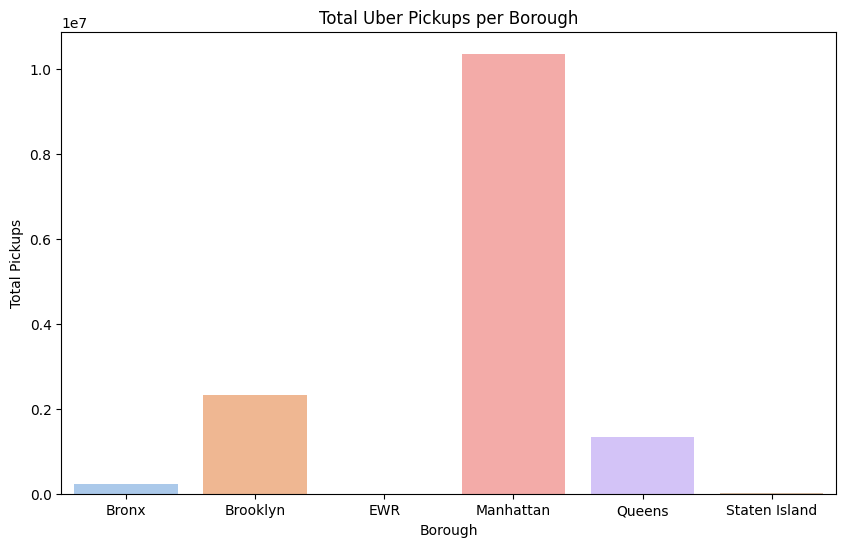

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'borough' column is included
file_path = '/content/drive/MyDrive/Bootcamp Tech/Uber Data Analysis/UberData.csv'
df = pd.read_csv(file_path)

# Calculate total pickups per borough
borough_pickups = df.groupby('borough')['pickups'].sum().reset_index()

# Define a custom color palette with more colors than the number of boroughs
colors = sns.color_palette('pastel', 6)

# Create a bar chart with cycling colors
plt.figure(figsize=(10, 6))
sns.barplot(x='borough', y='pickups', data=borough_pickups, palette=colors)
plt.title('Total Uber Pickups per Borough')
plt.xlabel('Borough')
plt.ylabel('Total Pickups')
plt.show()


##**Which borough has the highest average number of hourly pickups?**


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Index(['pickup_dt', 'borough', 'pickups', 'spd', 'vsb', 'temp', 'dewp', 'slp',
       'pcp01', 'pcp06', 'pcp24', 'sd', 'hday'],
      dtype='object')
Borough with the highest average number of hourly pickups:
borough      Manhattan
pickups    2387.253281
Name: 3, dtype: object


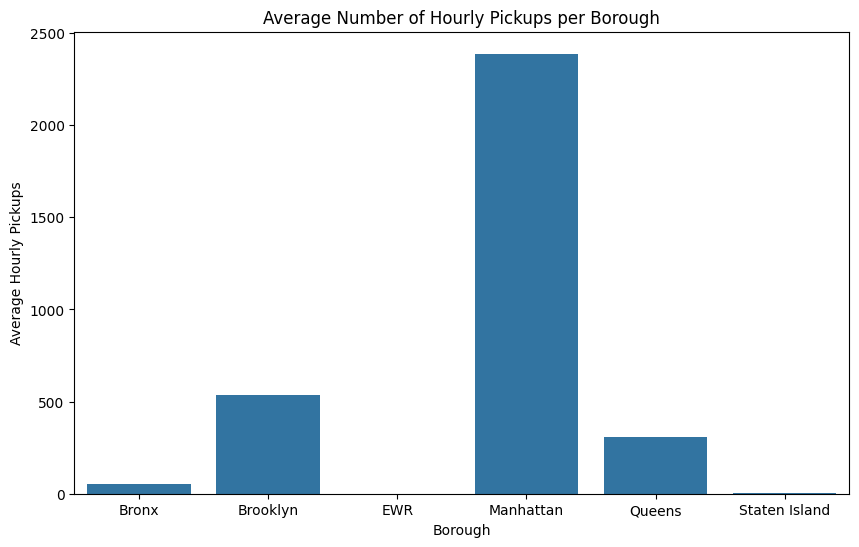

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Define the file path
file_path = '/content/drive/MyDrive/Bootcamp Tech/Uber Data Analysis/UberData.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Check the column names
print(df.columns)

# Calculate the average number of hourly pickups per borough
average_pickups = df.groupby('borough')['pickups'].mean().reset_index()

# Find the borough with the highest average number of hourly pickups
highest_average_pickups_borough = average_pickups.loc[average_pickups['pickups'].idxmax()]

print("Borough with the highest average number of hourly pickups:")
print(highest_average_pickups_borough)

# Create a bar chart for the average number of hourly pickups per borough
plt.figure(figsize=(10, 6))
sns.barplot(x='borough', y='pickups', data=average_pickups)
plt.title('Average Number of Hourly Pickups per Borough')
plt.xlabel('Borough')
plt.ylabel('Average Hourly Pickups')
plt.show()


##**How do the number of pickups vary across different hours of the day?**

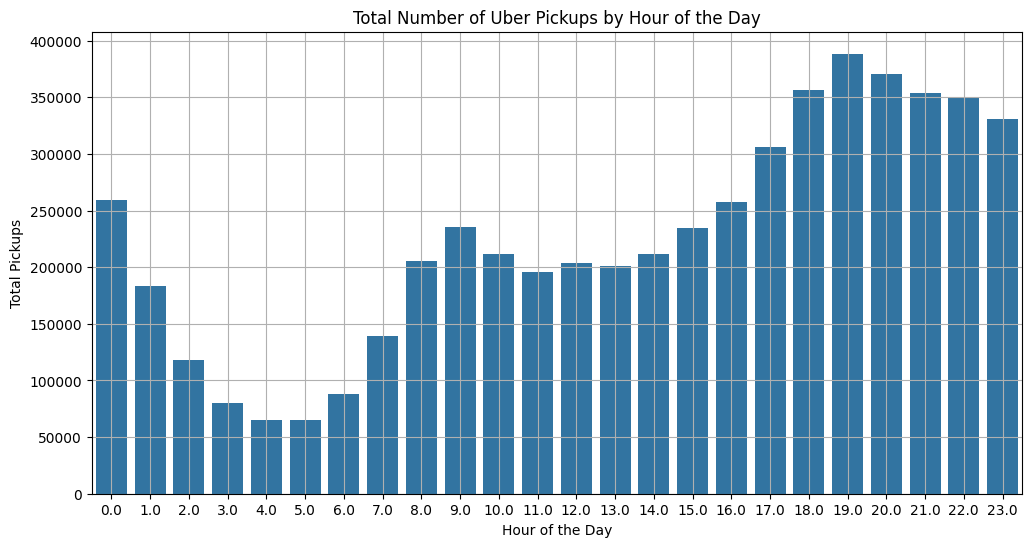

In [ ]:
# Convert 'pickup_dt' to datetime format with dayfirst=True
df['pickup_dt'] = pd.to_datetime(df['pickup_dt'], dayfirst=True, errors='coerce')

# Extract the hour from 'pickup_dt'
df['hour'] = df['pickup_dt'].dt.hour

# Group by the hour and calculate the total number of pickups
hourly_pickups = df.groupby('hour')['pickups'].sum().reset_index()

# Create a bar chart for the number of pickups across different hours of the day
plt.figure(figsize=(12, 6))
sns.barplot(x='hour', y='pickups', data=hourly_pickups)
plt.title('Total Number of Uber Pickups by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Pickups')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()


##**Which day of the week has the highest number of pickups?**

Day with the highest number of Uber pickups: Thursday (875563.0 pickups)


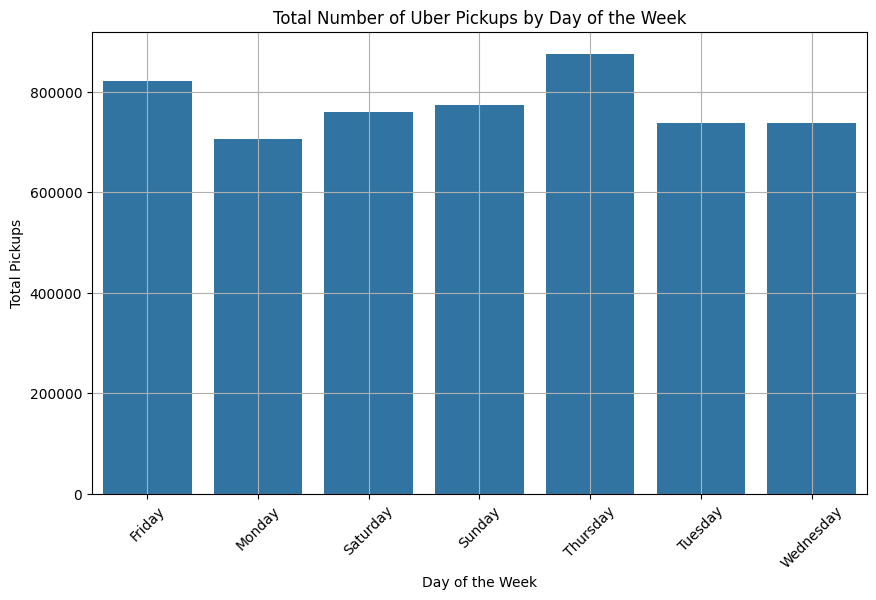

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Group by day of the week and calculate the total number of pickups
daily_pickups = df.groupby(df['pickup_dt'].dt.day_name())['pickups'].sum()

# Find the day with the highest number of pickups
max_pickups_day = daily_pickups.idxmax()
max_pickups_value = daily_pickups.max()

print(f"Day with the highest number of Uber pickups: {max_pickups_day} ({max_pickups_value} pickups)")

# Create a bar chart for the number of pickups across different days of the week
plt.figure(figsize=(10, 6))
sns.barplot(x=daily_pickups.index, y=daily_pickups.values, order=daily_pickups.index)
plt.title('Total Number of Uber Pickups by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Pickups')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


#**2. Weather Impact**

##**What is the correlation between temperature and the number of pickups?**

In [ ]:
# Calculate the correlation between temperature and pickups
correlation = df['temp'].corr(df['pickups'])

print("Correlation between temperature and pickups:", correlation)


Correlation between temperature and pickups: 0.054164576372026985


##**How does visibility impact the number of pickups?**

Correlation between visibility and pickups: -0.007474433707060391


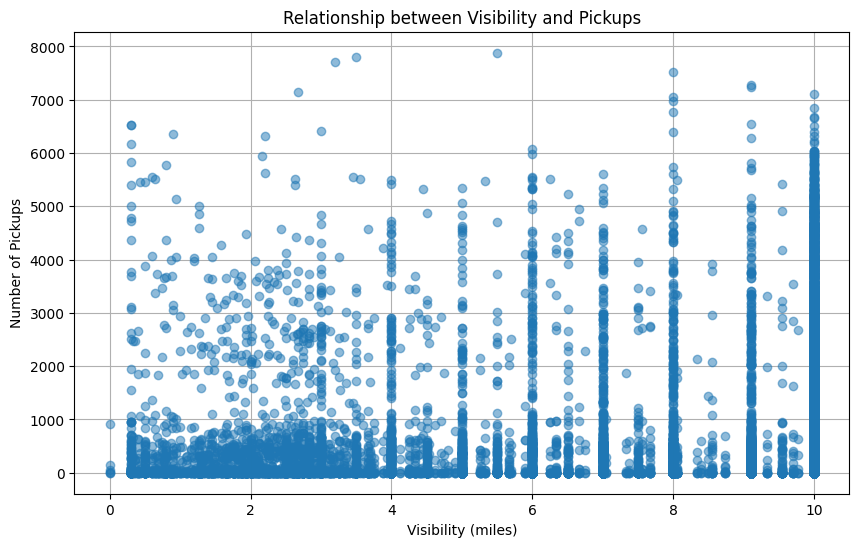

In [ ]:
import matplotlib.pyplot as plt

# Calculate the correlation between visibility and pickups
correlation = df['vsb'].corr(df['pickups'])

print("Correlation between visibility and pickups:", correlation)

# Plot the relationship between visibility and pickups
plt.figure(figsize=(10, 6))
plt.plot(df['vsb'], df['pickups'], 'o', alpha=0.5)
plt.title('Relationship between Visibility and Pickups')
plt.xlabel('Visibility (miles)')
plt.ylabel('Number of Pickups')
plt.grid(True)
plt.show()


##**Is there a relationship between wind speed and the number of pickups?**

Correlation between wind speed and pickups: 0.011110156997631706


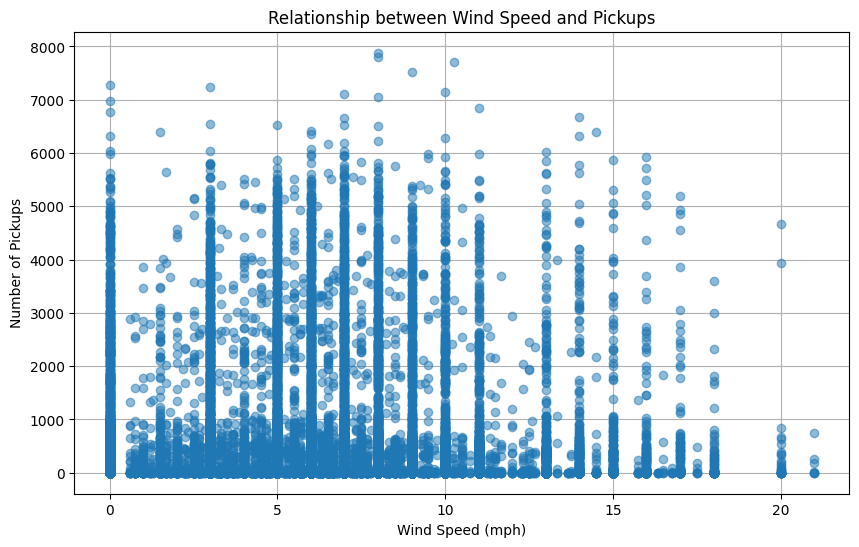

In [ ]:
import matplotlib.pyplot as plt

# Calculate the correlation between wind speed and pickups
correlation = df['spd'].corr(df['pickups'])

print("Correlation between wind speed and pickups:", correlation)

# Plot the relationship between wind speed and pickups
plt.figure(figsize=(10, 6))
plt.plot(df['spd'], df['pickups'], 'o', alpha=0.5)
plt.title('Relationship between Wind Speed and Pickups')
plt.xlabel('Wind Speed (mph)')
plt.ylabel('Number of Pickups')
plt.grid(True)
plt.show()


##**How does precipitation (1-hour, 6-hour, 24-hour) affect the number of pickups?**


Correlation between 1-hour precipitation and pickups: 0.004402340209845589
Correlation between 6-hour precipitation and pickups: -0.0029147893038063808
Correlation between 24-hour precipitation and pickups: -0.020227579523141814


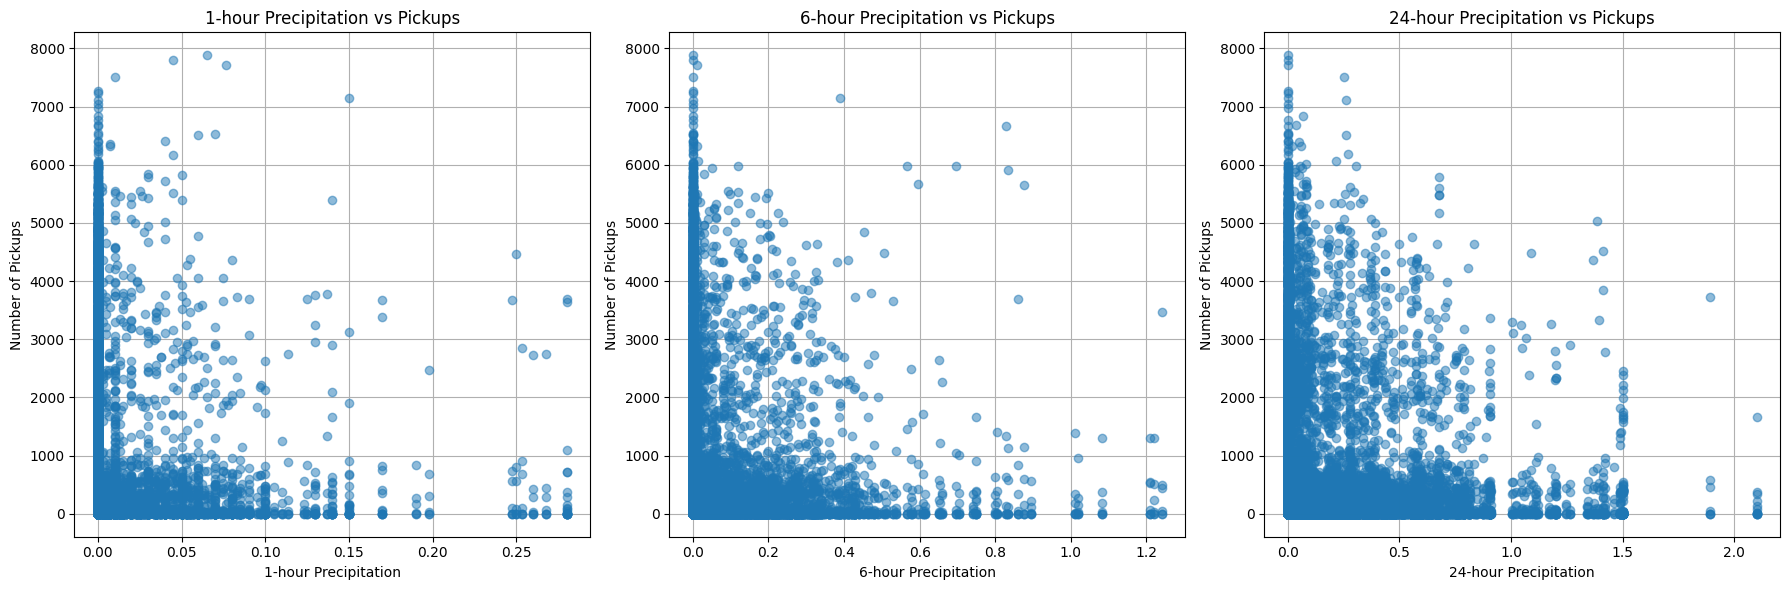

In [ ]:
import matplotlib.pyplot as plt

# Calculate the correlation between each type of precipitation and pickups
correlation_pcp01 = df['pcp01'].corr(df['pickups'])
correlation_pcp06 = df['pcp06'].corr(df['pickups'])
correlation_pcp24 = df['pcp24'].corr(df['pickups'])

print("Correlation between 1-hour precipitation and pickups:", correlation_pcp01)
print("Correlation between 6-hour precipitation and pickups:", correlation_pcp06)
print("Correlation between 24-hour precipitation and pickups:", correlation_pcp24)

# Plot the relationship between each type of precipitation and pickups
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.plot(df['pcp01'], df['pickups'], 'o', alpha=0.5)
plt.title('1-hour Precipitation vs Pickups')
plt.xlabel('1-hour Precipitation')
plt.ylabel('Number of Pickups')
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(df['pcp06'], df['pickups'], 'o', alpha=0.5)
plt.title('6-hour Precipitation vs Pickups')
plt.xlabel('6-hour Precipitation')
plt.ylabel('Number of Pickups')
plt.grid(True)

plt.subplot(1, 3, 3)
plt.plot(df['pcp24'], df['pickups'], 'o', alpha=0.5)
plt.title('24-hour Precipitation vs Pickups')
plt.xlabel('24-hour Precipitation')
plt.ylabel('Number of Pickups')
plt.grid(True)

plt.tight_layout()
plt.show()


#**3. Seasonal Trends**

##**How do the number of pickups vary across different seasons (winter, spring, summer, fall)?**

In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Bootcamp Tech/Uber Data Analysis/UberData.csv")


# Ensure 'pickup_dt' is in datetime format, assuming the format is dayfirst
df['pickup_dt'] = pd.to_datetime(df['pickup_dt'], dayfirst=True, errors='coerce')

# Function to determine the season
def get_season(date):
    if date.month in [12, 1, 2]:
        return 'Winter'
    elif date.month in [3, 4, 5]:
        return 'Spring'
    elif date.month in [6, 7, 8]:
        return 'Summer'
    elif date.month in [9, 10, 11]:
        return 'Fall'

# Apply the function to create a new column for season
df['season'] = df['pickup_dt'].apply(get_season)

# Group by season and calculate the total number of pickups
seasonal_pickups = df.groupby('season')['pickups'].sum().reset_index()

# Order the seasons correctly
season_order = ['Winter', 'Spring', 'Summer', 'Fall']
seasonal_pickups['season'] = pd.Categorical(seasonal_pickups['season'], categories=season_order, ordered=True)
seasonal_pickups = seasonal_pickups.sort_values('season')

# Display the processed data
print(seasonal_pickups)


   season    pickups
2  Winter  1594777.0
0  Spring  2702043.0
1  Summer  1115590.0


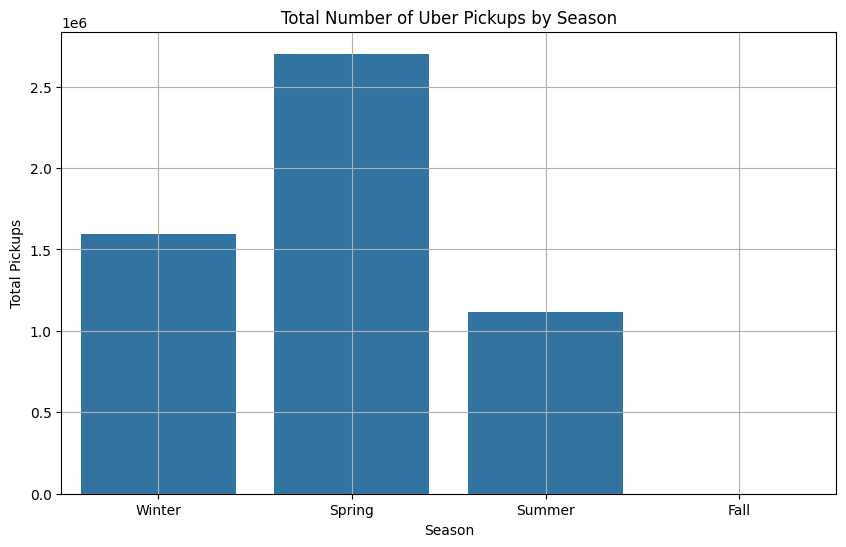

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar chart for the number of pickups across different seasons
plt.figure(figsize=(10, 6))
sns.barplot(x='season', y='pickups', data=seasonal_pickups, order=season_order)
plt.title('Total Number of Uber Pickups by Season')
plt.xlabel('Season')
plt.ylabel('Total Pickups')
plt.grid(True)
plt.show()


##**What is the average number of pickups during holidays compared to non-holidays?**

In [ ]:
# Group by holiday status and calculate the average number of pickups
holiday_pickups = df.groupby('hday')['pickups'].mean().reset_index()

# Display the processed data
print(holiday_pickups)


  hday     pickups
0    ?  878.500000
1    N  492.339957
2    Y  436.838854


<ipython-input-7-35e18650ec70>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='hday', y='pickups', data=holiday_pickups, palette=['#FF6347', '#4682B4'])
<ipython-input-7-35e18650ec70>:6: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x='hday', y='pickups', data=holiday_pickups, palette=['#FF6347', '#4682B4'])


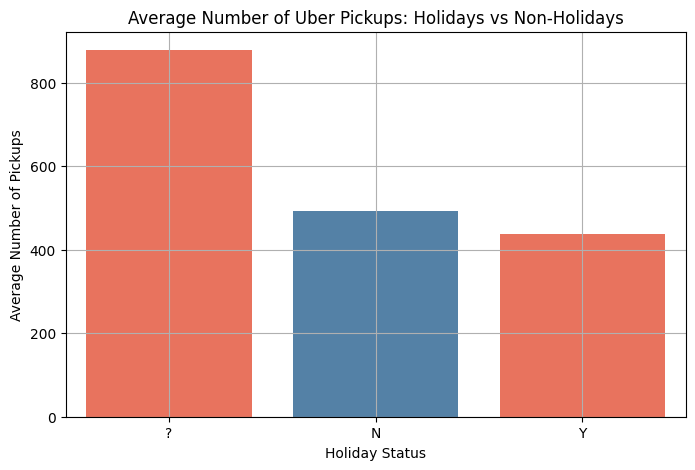

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar chart for the average number of pickups during holidays and non-holidays
plt.figure(figsize=(8, 5))
sns.barplot(x='hday', y='pickups', data=holiday_pickups, palette=['#FF6347', '#4682B4'])
plt.title('Average Number of Uber Pickups: Holidays vs Non-Holidays')
plt.xlabel('Holiday Status')
plt.ylabel('Average Number of Pickups')
plt.grid(True)
plt.show()


##**How does snow depth influence the number of pickups?**

In [ ]:
# Group by snow depth and calculate the average number of pickups
snow_depth_pickups = df.groupby('sd')['pickups'].mean().reset_index()

# Display the processed data
print(snow_depth_pickups)


            sd     pickups
0     0.000000  500.093280
1     0.041667   87.687500
2     0.083333  123.843750
3     0.125000  177.846154
4     0.166667  263.125000
..         ...         ...
414  18.833333  227.428571
415  18.875000  188.666667
416  18.916667  149.666667
417  18.958333  122.714286
418  19.000000  147.428571

[419 rows x 2 columns]


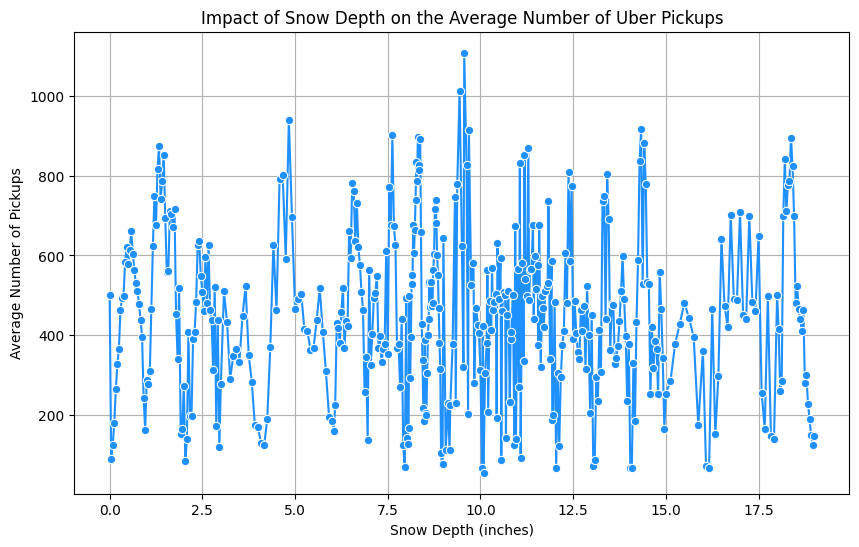

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a line chart for the average number of pickups across different snow depths
plt.figure(figsize=(10, 6))
sns.lineplot(x='sd', y='pickups', data=snow_depth_pickups, marker='o', color='#1E90FF') # Using DodgerBlue for the line
plt.title('Impact of Snow Depth on the Average Number of Uber Pickups')
plt.xlabel('Snow Depth (inches)')
plt.ylabel('Average Number of Pickups')
plt.grid(True)
plt.show()


#**4. Hourly Trends**

##**What are the peak hours for Uber pickups in each borough?**

In [ ]:
# Ensure 'pickup_dt' is in datetime format
df['pickup_dt'] = pd.to_datetime(df['pickup_dt'], dayfirst=True, errors='coerce')

# Extract the hour from 'pickup_dt'
df['hour'] = df['pickup_dt'].dt.hour

# Group by borough and hour, and calculate the total number of pickups
borough_hourly_pickups = df.groupby(['borough', 'hour'])['pickups'].sum().reset_index()

# Identify the peak hour for each borough
peak_hours = borough_hourly_pickups.loc[borough_hourly_pickups.groupby('borough')['pickups'].idxmax()]

# Display the processed data
print(peak_hours)


           borough  hour   pickups
18           Bronx  18.0    4597.0
47        Brooklyn  23.0   56183.0
63             EWR  15.0       7.0
91       Manhattan  19.0  302187.0
118         Queens  22.0   32034.0
136  Staten Island  16.0     175.0


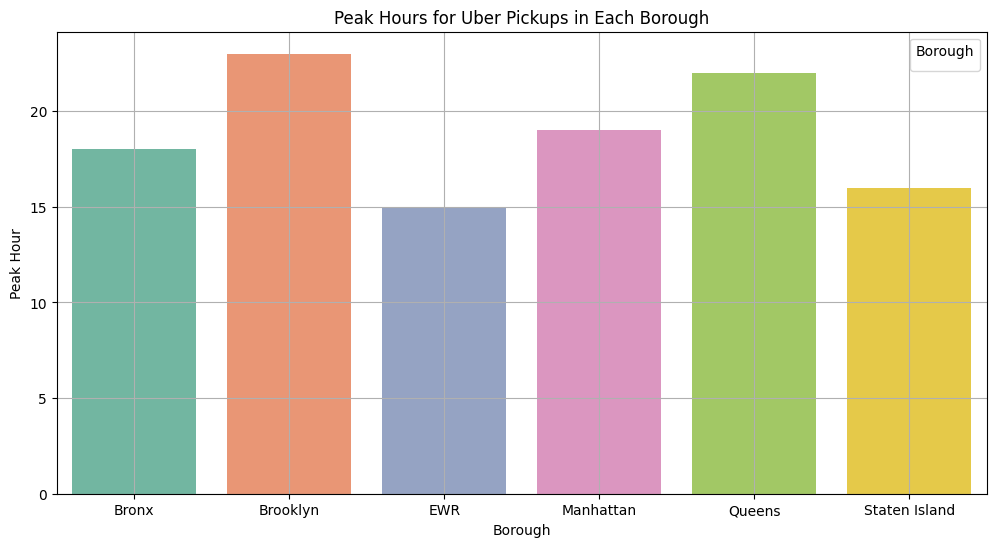

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar chart for the peak hours for Uber pickups in each borough
plt.figure(figsize=(12, 6))
sns.barplot(x='borough', y='hour', hue='borough', data=peak_hours, dodge=False, palette='Set2')
plt.title('Peak Hours for Uber Pickups in Each Borough')
plt.xlabel('Borough')
plt.ylabel('Peak Hour')
plt.legend(title='Borough', loc='upper right')
plt.grid(True)
plt.show()


##**How do the number of pickups change during rush hours (e.g., 7-9 AM, 5-7 PM)?**

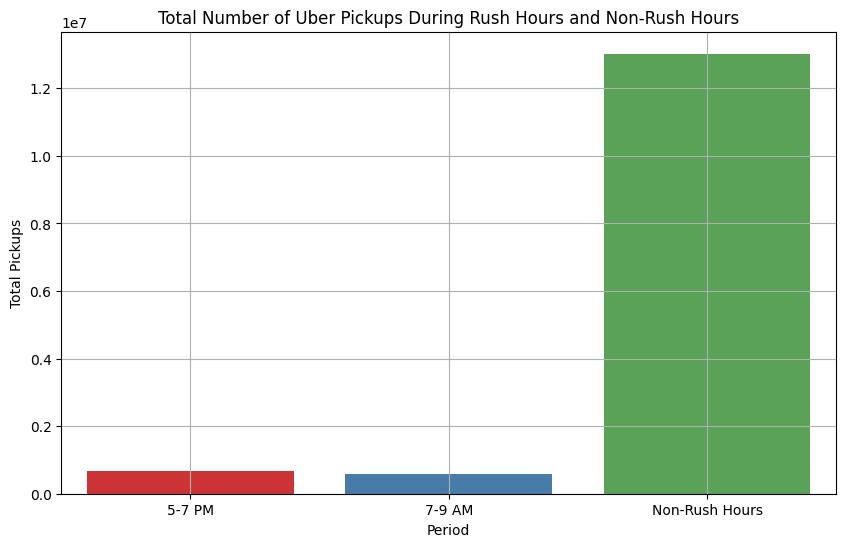

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar chart for the number of pickups during rush hours and non-rush hours
plt.figure(figsize=(10, 6))
sns.barplot(x='rush_hour', y='pickups', data=rush_hour_pickups, hue='rush_hour', palette='Set1', legend=False)
plt.title('Total Number of Uber Pickups During Rush Hours and Non-Rush Hours')
plt.xlabel('Period')
plt.ylabel('Total Pickups')
plt.grid(True)
plt.show()


##**What is the average number of pickups during late-night hours (e.g., 12 AM - 4 AM)?**

In [ ]:
# Ensure 'pickup_dt' is in datetime format
df['pickup_dt'] = pd.to_datetime(df['pickup_dt'], dayfirst=True, errors='coerce')

# Extract the hour from 'pickup_dt'
df['hour'] = df['pickup_dt'].dt.hour

# Create a flag for late-night hours (12 AM - 4 AM)
df['late_night'] = df['hour'].apply(lambda x: True if 0 <= x < 4 else False)

# Filter the data for late-night hours
late_night_pickups = df[df['late_night']]['pickups']

# Calculate the average number of pickups during late-night hours
average_pickups_late_night = late_night_pickups.mean()

print("Average number of pickups during late-night hours (12 AM - 4 AM):", average_pickups_late_night)


Average number of pickups during late-night hours (12 AM - 4 AM): 342.05176093916754


#**5. Borough Comparison**

##**How do pickup trends differ between boroughs during different weather conditions?**

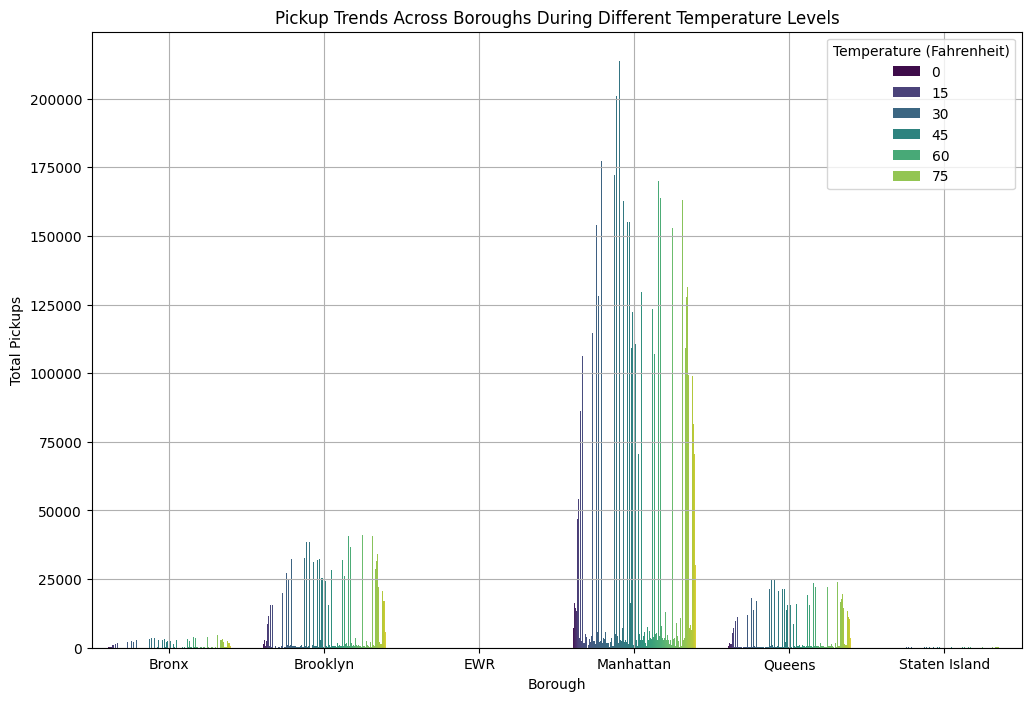

In [ ]:
# Group the data by 'borough' and 'temp' and calculate the total number of pickups for each combination
pickup_trends_temp = df.groupby(['borough', 'temp'])['pickups'].sum().reset_index()

# Visualize the results
plt.figure(figsize=(12, 8))
sns.barplot(x='borough', y='pickups', hue='temp', data=pickup_trends_temp, palette='viridis')
plt.title('Pickup Trends Across Boroughs During Different Temperature Levels')
plt.xlabel('Borough')
plt.ylabel('Total Pickups')
plt.legend(title='Temperature (Fahrenheit)')
plt.grid(True)
plt.show()


##**Which borough shows the highest increase in pickups during holidays?**

In [ ]:
# Calculate the average number of pickups during holidays and non-holidays for each borough
average_pickups = df.groupby(['borough', 'hday'])['pickups'].mean().unstack()

# Calculate the difference between the average pickups during holidays and non-holidays
average_pickups['pickup_increase'] = average_pickups['Y'] - average_pickups['N']

# Find the borough with the highest increase in pickups during holidays
borough_with_highest_increase = average_pickups['pickup_increase'].idxmax()

print("Borough with the highest increase in pickups during holidays:", borough_with_highest_increase)
print("Increase in pickups during holidays:", average_pickups.loc[borough_with_highest_increase, 'pickup_increase'])


Borough with the highest increase in pickups during holidays: Queens
Increase in pickups during holidays: 12.657671543016363


##**How does the number of pickups compare between weekdays and weekends for each borough?**

In [ ]:
# Convert 'pickup_dt' to datetime format
df['pickup_dt'] = pd.to_datetime(df['pickup_dt'])

# Extract the day of the week (0 = Monday, 6 = Sunday)
df['day_of_week'] = df['pickup_dt'].dt.dayofweek

# Map the day of the week to 'weekday' or 'weekend'
df['day_type'] = df['day_of_week'].map({0: 'Weekday', 1: 'Weekday', 2: 'Weekday', 3: 'Weekday', 4: 'Weekday', 5: 'Weekend', 6: 'Weekend'})

# Group the data by 'borough' and 'day_type' and calculate the total number of pickups for each combination
pickup_comparison = df.groupby(['borough', 'day_type'])['pickups'].sum().reset_index()


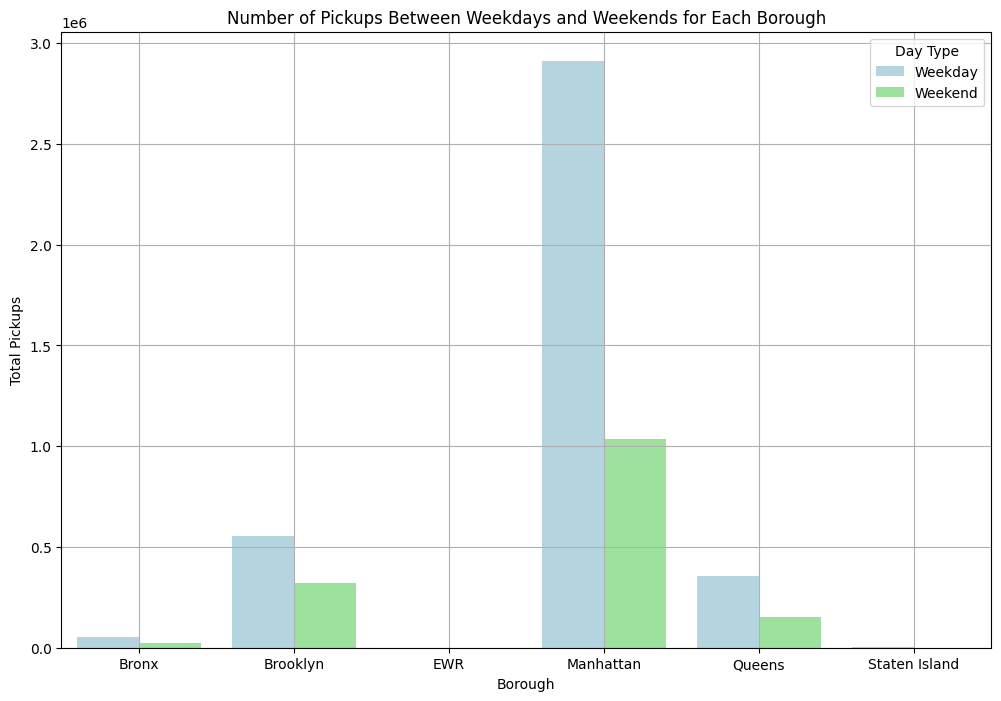

In [ ]:
# Visualize the results
plt.figure(figsize=(12, 8))
sns.barplot(x='borough', y='pickups', hue='day_type', data=pickup_comparison, palette=['lightblue', 'lightgreen'])
plt.title('Number of Pickups Between Weekdays and Weekends for Each Borough')
plt.xlabel('Borough')
plt.ylabel('Total Pickups')
plt.legend(title='Day Type')
plt.grid(True)
plt.show()


#**6. Weather Extremes**

##**How do extreme weather conditions (e.g., very high or very low temperatures, heavy rainfall, snowstorms) affect the number of pickups?**

In [ ]:
# Define extreme weather conditions based on thresholds
high_temp_threshold = 90  # Fahrenheit
low_temp_threshold = 30   # Fahrenheit
heavy_rainfall_threshold = 0.5  # inches
snowstorm_threshold = 6   # inches

# Create categorical variables for extreme weather conditions
df['extreme_weather'] = 'None'
df.loc[df['temp'] > high_temp_threshold, 'extreme_weather'] = 'High Temperature'
df.loc[df['temp'] < low_temp_threshold, 'extreme_weather'] = 'Low Temperature'
df.loc[df['pcp01'] > heavy_rainfall_threshold, 'extreme_weather'] = 'Heavy Rainfall'
df.loc[df['sd'] > snowstorm_threshold, 'extreme_weather'] = 'Snowstorm'


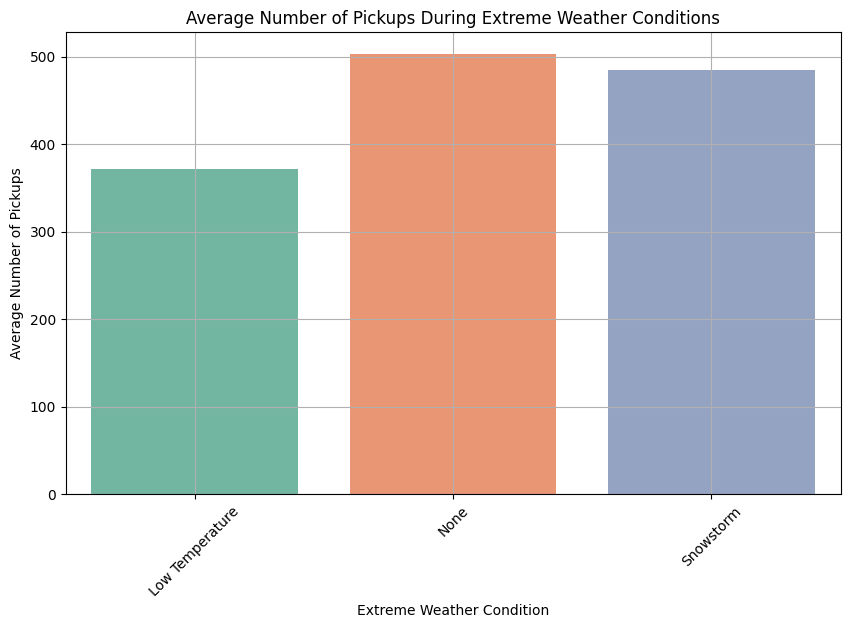

In [ ]:
# Visualize the results
plt.figure(figsize=(10, 6))
sns.barplot(x='extreme_weather', y='pickups', hue='extreme_weather', data=extreme_weather_pickups, palette='Set2', legend=False)
plt.title('Average Number of Pickups During Extreme Weather Conditions')
plt.xlabel('Extreme Weather Condition')
plt.ylabel('Average Number of Pickups')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


##**What is the impact of visibility less than 1 mile on the number of pickups?**

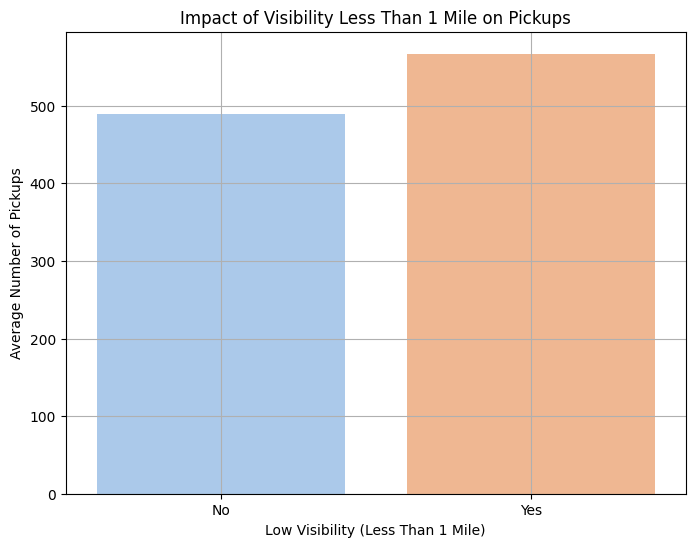

In [ ]:
import numpy as np

# Create a categorical variable for visibility less than 1 mile
df['low_visibility'] = np.where(df['vsb'] < 1, 'Yes', 'No')

# Group the data by visibility category and calculate the average number of pickups
visibility_pickups = df.groupby('low_visibility')['pickups'].mean().reset_index()

# Visualize the results
plt.figure(figsize=(8, 6))
sns.barplot(x='low_visibility', y='pickups', hue='low_visibility', data=visibility_pickups, palette='pastel', legend=False)
plt.title('Impact of Visibility Less Than 1 Mile on Pickups')
plt.xlabel('Low Visibility (Less Than 1 Mile)')
plt.ylabel('Average Number of Pickups')
plt.grid(True)
plt.show()


#**7. Data Correlations**

##**Is there a correlation between sea level pressure and the number of pickups?**

In [ ]:
# Calculate the correlation coefficient between sea level pressure and number of pickups
correlation = df['slp'].corr(df['pickups'])

print("Correlation coefficient between sea level pressure and number of pickups:", correlation)


Correlation coefficient between sea level pressure and number of pickups: -0.001997022878140221


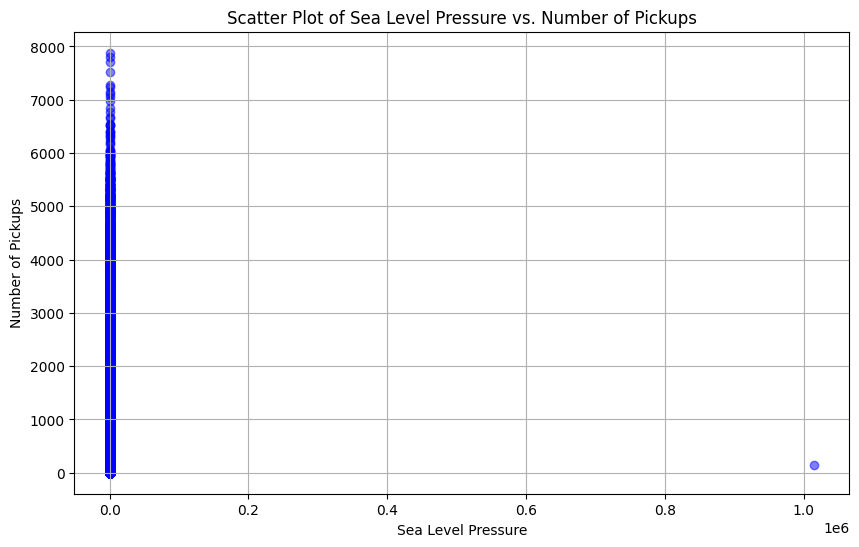

In [ ]:
# Create a scatter plot to visualize the relationship between sea level pressure and number of pickups
plt.figure(figsize=(10, 6))
plt.scatter(df['slp'], df['pickups'], alpha=0.5, color='blue')
plt.title('Scatter Plot of Sea Level Pressure vs. Number of Pickups')
plt.xlabel('Sea Level Pressure')
plt.ylabel('Number of Pickups')
plt.grid(True)
plt.show()


##**How do different weather variables (temperature, dew point, wind speed, visibility) collectively impact the number of pickups?**

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df[['temp', 'dewp', 'spd', 'vsb', 'pickups']].corr()

# Print the correlation matrix
print(correlation_matrix)


             temp      dewp       spd       vsb   pickups
temp     1.000000  0.895877 -0.293846  0.026568  0.054165
dewp     0.895877  1.000000 -0.321730 -0.232188  0.033437
spd     -0.293846 -0.321730  1.000000  0.089056  0.011110
vsb      0.026568 -0.232188  0.089056  1.000000 -0.007474
pickups  0.054165  0.033437  0.011110 -0.007474  1.000000


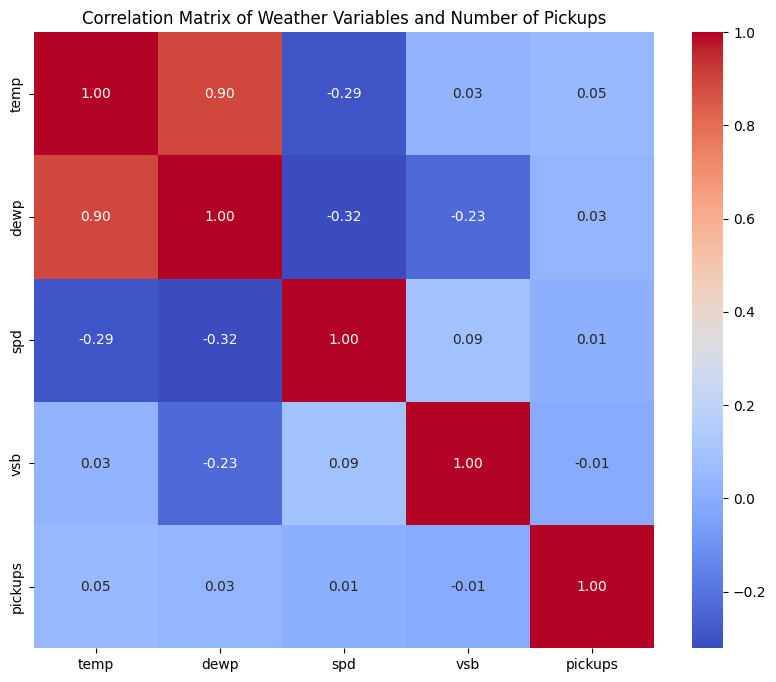

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df[['temp', 'dewp', 'spd', 'vsb', 'pickups']].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix of Weather Variables and Number of Pickups')
plt.show()


##**What is the relationship between holiday status and weather conditions on the number of pickups?**

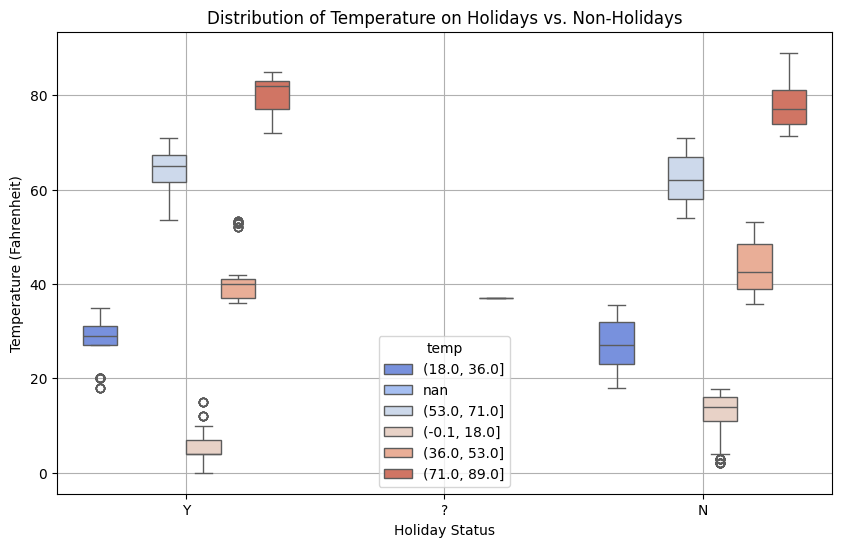

In [ ]:
# Convert temperature bins to numeric format
temperature_bins = pd.cut(df['temp'], bins=5, precision=0).astype('str')

# Box plot: Distribution of number of pickups on holidays vs. non-holidays for each temperature variable
plt.figure(figsize=(10, 6))
sns.boxplot(x='hday', y='temp', data=df, hue=temperature_bins, palette='coolwarm')
plt.title('Distribution of Temperature on Holidays vs. Non-Holidays')
plt.xlabel('Holiday Status')
plt.ylabel('Temperature (Fahrenheit)')
plt.grid(True)
plt.show()


#**8. Growth Insights**

##**Which weather conditions are most favorable for Uber pickups, and how can this information be used to optimize driver availability?**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Select independent variables (weather features) and target variable (number of pickups)
X = df[['temp', 'pcp01', 'spd', 'vsb']]  # Using the provided column names
y = df['pickups']

# Impute missing values with the mean for the independent variables
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Remove rows where the target variable 'pickups' is NaN
non_nan_indices = ~y.isna()
X = X[non_nan_indices]
y = y[non_nan_indices]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing data
predictions = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, predictions)
print("Mean Absolute Error:", mae)

# Interpret coefficients
coefficients = dict(zip(['temp', 'pcp01', 'spd', 'vsb'], model.coef_))
print("Coefficients:", coefficients)


Mean Absolute Error: 610.9859164979256
Coefficients: {'temp': 3.131799725114747, 'pcp01': 111.71262622290078, 'spd': 6.893742684407087, 'vsb': -3.110817852429806}


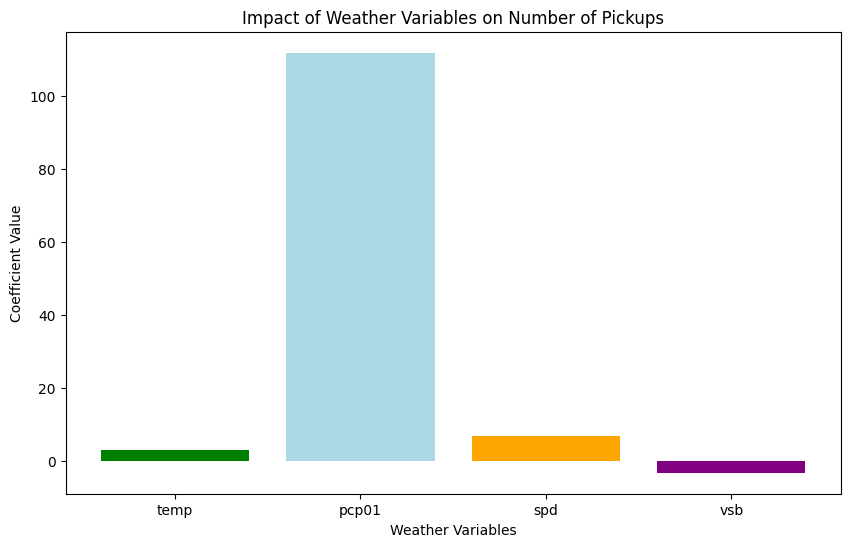

In [ ]:
# Visualize the coefficients
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(coefficients.keys(), coefficients.values(), color=['green', 'lightblue', 'orange', 'purple'])
plt.xlabel('Weather Variables')
plt.ylabel('Coefficient Value')
plt.title('Impact of Weather Variables on Number of Pickups')
plt.show()


##**Based on the data, what recommendations can be made to Uber to increase pickups during low-demand periods?**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Select independent variables (weather features) and target variable (number of pickups)
X = df[['temp', 'pcp01', 'spd', 'vsb']]  # Using the provided column names
y = df['pickups']

# Impute missing values in X with the mean for simplicity
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Remove or impute missing values in y
y = y.fillna(y.mean())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the testing data
predictions = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, predictions)
print("Mean Absolute Error:", mae)

# Interpret feature importance
feature_importances = model.feature_importances_
features = ['temp', 'pcp01', 'spd', 'vsb']
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)



Mean Absolute Error: 673.9878511255482


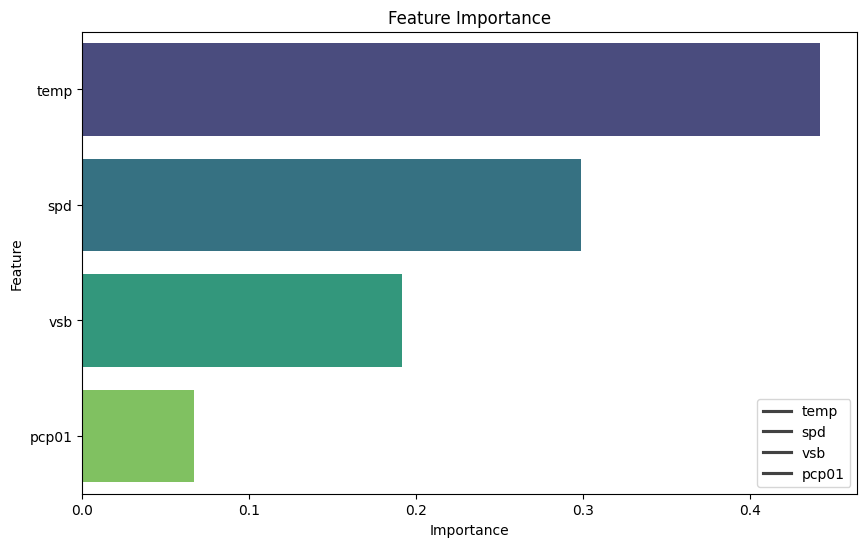

In [ ]:
# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, hue='Feature', palette='viridis')
plt.title('Feature Importance')
plt.legend(loc='lower right', labels=importance_df['Feature'])
plt.show()
